Epoch 1/2500
13/13 [==============================] - 0s 2ms/step - loss: 197.5755
Epoch 2/2500
13/13 [==============================] - 0s 3ms/step - loss: 167.2582
Epoch 3/2500
13/13 [==============================] - 0s 1ms/step - loss: 134.0328
Epoch 4/2500
13/13 [==============================] - 0s 1ms/step - loss: 92.1894
Epoch 5/2500
13/13 [==============================] - 0s 1ms/step - loss: 57.6212
Epoch 6/2500
13/13 [==============================] - 0s 1ms/step - loss: 43.5738
Epoch 7/2500
13/13 [==============================] - 0s 2ms/step - loss: 34.7647
Epoch 8/2500
13/13 [==============================] - 0s 3ms/step - loss: 28.4463
Epoch 9/2500
13/13 [==============================] - 0s 1ms/step - loss: 28.2468
Epoch 10/2500
13/13 [==============================] - 0s 1ms/step - loss: 25.0381
Epoch 11/2500
13/13 [==============================] - 0s 3ms/step - loss: 22.0736
Epoch 12/2500
13/13 [==============================] - 0s 3ms/step - loss: 22.9550
Epoch 13/2

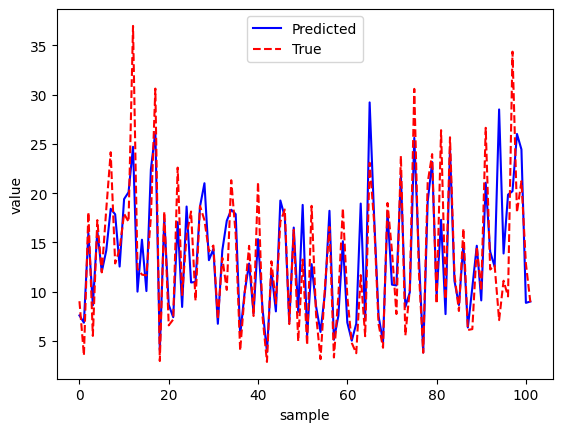

In [2]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np


data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])


X = data[:, :-1]
y = data[:, -1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = tf.keras.Sequential([
        tf.keras.layers.Dense(80, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(60, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(1)
    ])

opt = keras.optimizers.Adam(0.001)
model.compile(optimizer=opt, loss='mean_squared_error')

history = model.fit(X_train_scaled, y_train, epochs=2500, batch_size=32)


predictions = model.predict(X_test_scaled)


plt.plot(predictions.flatten(), color="b", label='Predicted')
plt.plot(y_test, color="r", linestyle='--', label='True')

plt.xlabel('sample')
plt.ylabel('value')
plt.legend()
plt.show()
